# Phase 4 Project

## Business Understanding
In the vast landscape of the film industry, where a multitude of genres, directors, actors, and production styles coexist, the process of choosing a movie to watch has become both a thrilling and daunting task for consumers. The sheer volume of content available on streaming platforms has made discovery challenging, leading to an increased demand for personalized recommendations.Delving into the nuances of user preferences, it is imperative  to seamlessly connect viewers with movies that resonate with their tastes, thus streamlining the process of discovering subsequent films within the same niche.

## Business Problem

The modern film enthusiast faces a paradox of choice - a wealth of cinematic options, yet a struggle to find films that align with their preferences. The challenge lies not only in the initial selection but also in the subsequent quest for movies within the same niche or genre. Users often find themselves lost in the vast sea of content, seeking a solution that not only recommends the first movie but also facilitates a fluid journey through related titles.

## Objectives:

1. Enhance user satisfaction and engagement by delivering highly personalized and
relevant movie recommendations
2. Improve customer retention by continuously tailoring suggestions based on changing
user preferences
3. Increase active usage and interactions with the platform through accurate
recommendations


## Differentiation Strategy:

- Focus on implementing a hybrid recommendation system that combines collaborative
filtering and content-based filtering to leverage both user-item interactions as well as
movie content features
- Fine-tune the recommendation models to account for unique characteristics of movie
preferences and viewing behaviors
- Prioritize transparency and user control by allowing customization of recommendation
filters


## Impact:

* Positive impact on key metrics including number of active users, time spent on platform,
recommendation accuracy
* Enhanced user experience leading to improved customer satisfaction and retention
* Increased adoption and continuous usage of platform due to high-quality
recommendations


## Scope:

* Utilize MovieLens latest dataset containing movie information, user ratings and tags
* Implement collaborative filtering, content-based models and a hybrid approach
* Focus on personalized suggestions tailored to each user's tastes and preferences

## Success Criteria:

- Increased user engagement measured by interactions and time spent
- Higher perceived relevance and satisfaction scores from user surveys
- Growth in registered and active user base attributable to recommendations
- Quantifiable improvements in recommendation accuracy metrics

## Data Pre-processing & EDA

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:

def open_csv(file_path):
    """
    Opens a CSV file and returns a Pandas DataFrame. 
    Prints the first few rows and provides DataFrame information.

    Parameters:
    - file_path (str): The path to the CSV file.

    Returns:
    - pd.DataFrame: The Pandas DataFrame containing the data from the CSV file.
    
    """
    try:
        # Use the read_csv function to read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Display the first few rows of the DataFrame
        print("First few rows of the DataFrame:")
        print(df.head())

        # Display DataFrame information
        print("\nDataFrame Information:")
        df.info()

        # Check for null values
        null_counts = df.isnull().sum()
        if null_counts.any():
            print("\nNull Value Counts:")
            print(null_counts)
        # Check for Duplicates and Drop
        print("Duplicates:")
        duplicates = df[df.duplicated()]
        print(duplicates)

        # Drop duplicates and update the DataFrame
        df = df.drop_duplicates()

        # Explore Data Distributions
        print("\nData Distributions:")
        df.hist(figsize=(12, 10), bins=20)
        plt.show()

        # Outlier Detection
        print("\nOutlier Detection:")
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        for column in numeric_cols:
            sns.boxplot(x=df[column])
            plt.show()
    
        return df
    except Exception as e:
        # Handle exceptions (e.g., file not found, incorrect format)
        print(f"Error: {e}")
        return None


First few rows of the DataFrame:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB

Null Value Counts:
movieId    0
imdbId     0
tmdbId     8
dtype: int64
Duplicates:
Empty DataFrame
Columns: [movieId, imdbId, tmdbId]
Index: []

Data Distributions:


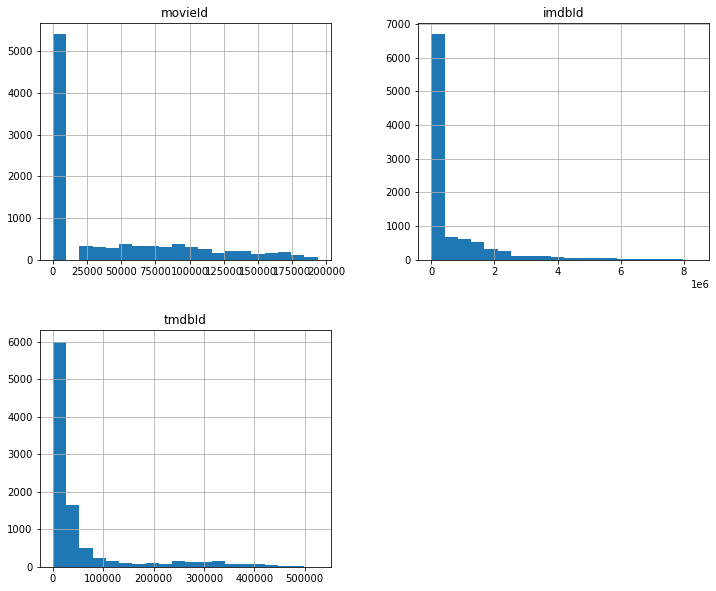


Outlier Detection:


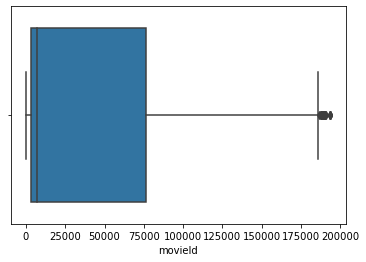

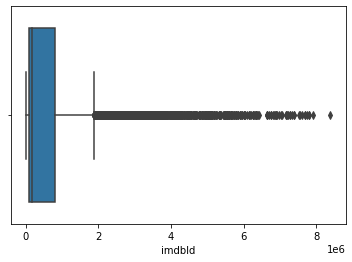

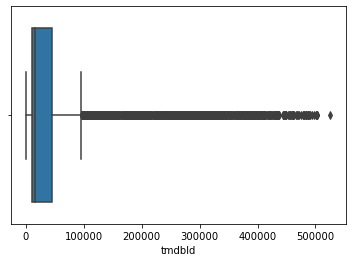

In [21]:
links_df = open_csv("ml-latest-small/links.csv")

In [22]:
links_df.dropna(inplace=True)

links_df.isnull().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

First few rows of the DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
Dupli

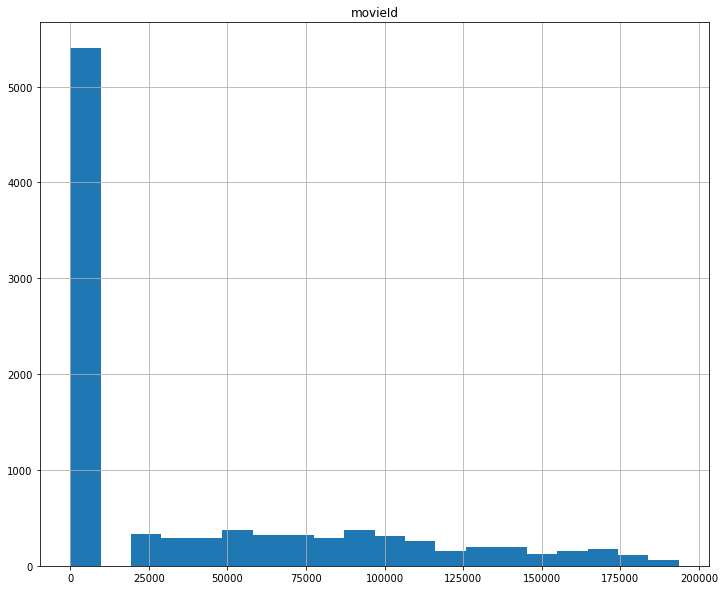


Outlier Detection:


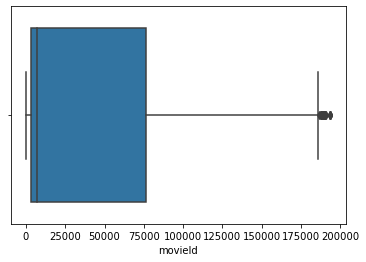

In [23]:

movies_df = open_csv("ml-latest-small/movies.csv")

First few rows of the DataFrame:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
Duplicates:
Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []

Data Distributions:


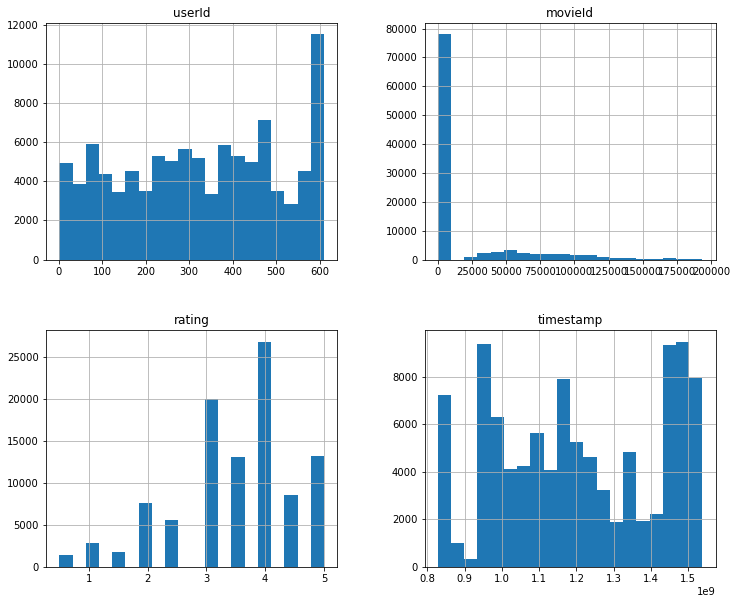


Outlier Detection:


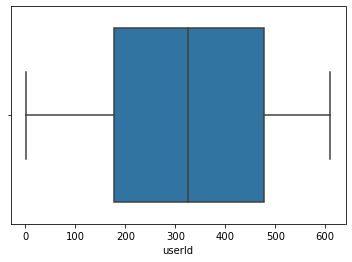

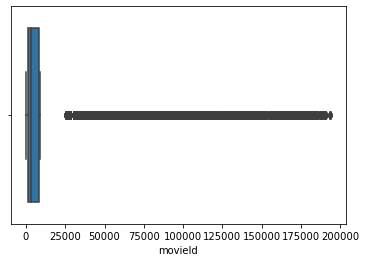

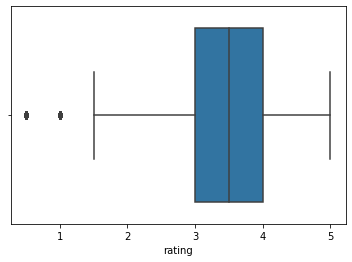

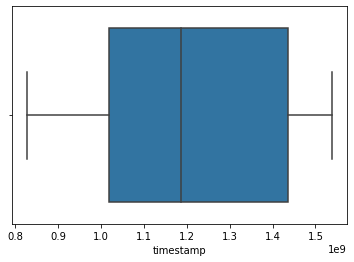

In [24]:

ratings_df = open_csv("ml-latest-small/ratings.csv")

First few rows of the DataFrame:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
Duplicates:
Empty DataFrame
Columns: [userId, movieId, tag, timestamp]
Index: []

Data Distributions:


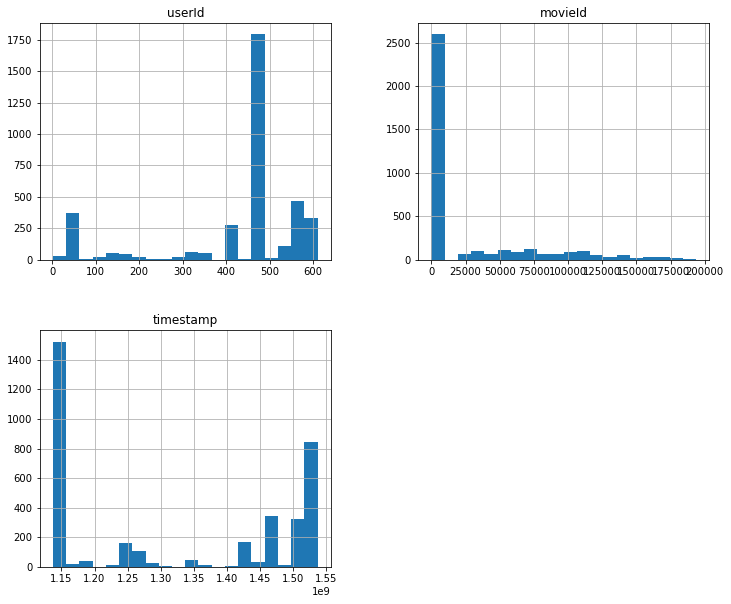


Outlier Detection:


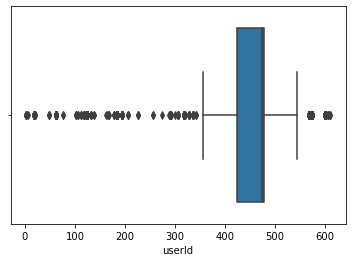

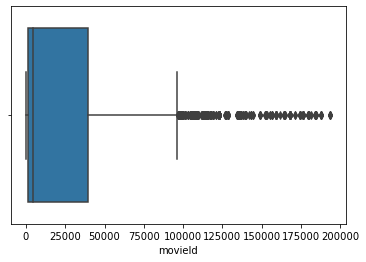

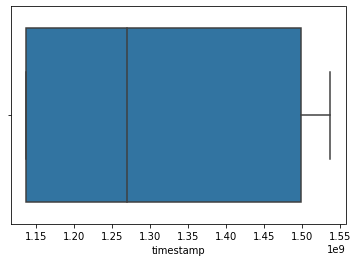

In [25]:

tags_df = open_csv("ml-latest-small/tags.csv")

### Distribution of movie genres

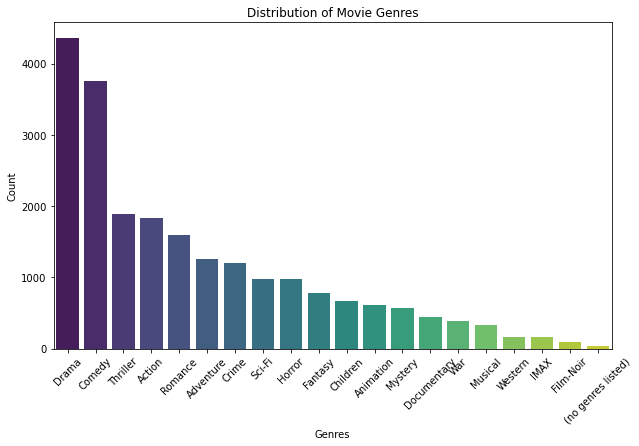

In [26]:
# Split genres into individual genres and create a new column 'genre_list'
movies_df['genre_list'] = movies_df['genres'].str.split('|')

# Count the occurrences of each genre after exploding the 'genre_list'
genre_counts = movies_df['genre_list'].explode().value_counts()

# Create a bar plot to visualize the distribution of movie genres
plt.figure(figsize=(10, 6))

# Use Seaborn to create a bar plot with better aesthetics
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')

# Set the plot title
plt.title('Distribution of Movie Genres')

# Set the x-axis label
plt.xlabel('Genres')

# Set the y-axis label
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

### Distribution of ratings

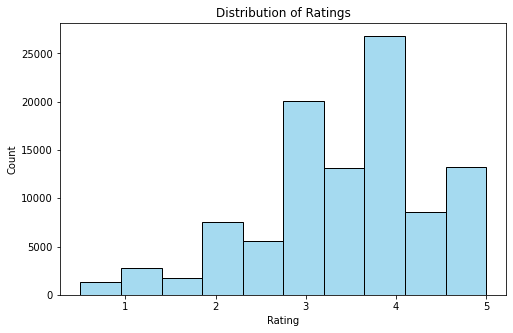

In [27]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Create a histogram using Seaborn
sns.histplot(ratings_df['rating'], bins=10, kde=False, color='skyblue', edgecolor='black')

# Set the plot title
plt.title('Distribution of Ratings')

# Set the x-axis label
plt.xlabel('Rating')

# Set the y-axis label
plt.ylabel('Count')

# Display the plot
plt.show()